# Ideação
## Recomendação para pontos de venda locais
### Pontifícia Universidade Católica de Campinas
#### Breno Coltro da Costa
#### João Roberto Crespi Júnior

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
vendas = pd.read_excel(io='C:/Users/breno/Desktop/Minhas coisas/PUCC/Segundo Semestre/ABI Academy Hack/Projetos/Ideação/Venda Cruzada - Venda Adicional/Data.xlsx')

In [3]:
vendas.head()

,Unnamed: 0,Doc. Date,Material,Order qty,Ship-to nu,PCS delivered,HL delivered,delivery_days,delivery_flag,lead_time_creation_vs_rdd_flag,...,Container Size,Variétés,Segment LE,Latitude,Longitude,Degre Alc,TTC,Brut + TE,Net + TE - Hors majoration de rompu de palette,DA
0,0,2021-01-11,10946,5.0,29606863,350.0,21.0,7,1,1,...,"6,000 L",Blonde,PREMIUM,50.6455,2.9619,6.6,18.137448,15.582,15.114540,0.0
1,1,2021-01-11,19898,2.0,29606863,140.0,8.4,7,1,1,...,NaN,NaN,NaN,50.6455,2.9619,5.0,17.396467,14.688,14.497056,0.0
2,2,2021-01-11,80176,4.0,29606863,280.0,16.8,7,1,1,...,NaN,NaN,NaN,50.6455,2.9619,0.0,12.279859,10.368,10.233216,0.0
3,3,2021-01-11,66989,1.0,29606863,70.0,4.2,7,1,1,...,"6,000 L",-,SUPER PREMIUM,50.6455,2.9619,8.0,21.996000,18.330,18.330000,0.0
4,4,2021-01-08,11766,70.0,29378784,70.0,4.2,6,1,1,...,NaN,NaN,NaN,50.6978,2.2423,5.2,17.359200,14.466,14.466000,0.0


###### Remoção de colunas

# Análise exploratória

### Clientes [179]

In [4]:
vendas['Ship-to nu'].value_counts()

29379855    1448
29379651    1253
29595514    1198
29379625    1196
29563495    1181
            ... 
29801344      12
29724733       8
29996996       7
29801553       4
29833190       3
Name: Ship-to nu, Length: 179, dtype: int64

In [5]:
vendas['Ship-to nu'].value_counts().index  # 179
vendas['Ship-to nu'].value_counts().values.sum()  # 73.670
vendas['Ship-to nu'].value_counts().values

array([1448, 1253, 1198, 1196, 1181, 1149, 1044,  996,  984,  978,  959,
        928,  926,  916,  885,  870,  851,  844,  838,  824,  800,  789,
        788,  779,  767,  732,  715,  708,  700,  697,  693,  678,  670,
        670,  659,  659,  643,  638,  636,  632,  632,  619,  619,  616,
        597,  594,  586,  585,  578,  575,  574,  566,  565,  551,  545,
        538,  519,  498,  498,  496,  481,  474,  471,  467,  464,  461,
        459,  458,  455,  448,  441,  435,  409,  409,  399,  394,  394,
        392,  386,  382,  381,  376,  373,  368,  362,  358,  358,  352,
        351,  351,  349,  347,  345,  344,  333,  328,  319,  316,  316,
        315,  310,  309,  303,  299,  298,  294,  293,  281,  281,  267,
        261,  256,  251,  249,  249,  248,  244,  243,  242,  234,  233,
        232,  230,  223,  216,  216,  209,  207,  201,  200,  198,  191,
        188,  185,  184,  183,  178,  167,  156,  156,  154,  137,  136,
        134,  134,  133,  131,  129,  124,  118,  1

In [6]:
cumulativoclientes = []

for i in range(len(vendas['Ship-to nu'].value_counts().index)):
    cumulativoclientes.append(vendas['Ship-to nu'].value_counts().array[i] / 73670)
    
for i in range(1, len(vendas['Ship-to nu'].value_counts().index)):
    cumulativoclientes[i] += cumulativoclientes[i - 1]
    
cumulativoclientes

[0.019655219220849736,
 0.03666349938916791,
 0.052925207004207955,
 0.06915976652640152,
 0.08519071535224651,
 0.10078729469254785,
 0.11495859915840913,
 0.12847834939595493,
 0.14183521107642189,
 0.1551106284783494,
 0.16812813899823537,
 0.18072485407900094,
 0.19329442106692002,
 0.20572824759060673,
 0.21774127867517304,
 0.22955069906339076,
 0.24110221256956696,
 0.2525587077507805,
 0.2639337586534546,
 0.27511877290620335,
 0.28597801004479434,
 0.29668793267272975,
 0.3073842812542419,
 0.31795846341794487,
 0.328369757024569,
 0.3383059590063798,
 0.3480114021989955,
 0.3576218270666486,
 0.3671236595629157,
 0.37658476991991313,
 0.3859915840912176,
 0.3951947875661735,
 0.40428939866974345,
 0.4133840097733134,
 0.4223293063662278,
 0.4312746029591421,
 0.44000271480928466,
 0.44866295642731097,
 0.45729604995249085,
 0.46587484729197776,
 0.47445364463146467,
 0.48285597936744945,
 0.49125831410343423,
 0.4996199267001493,
 0.5077236324148229,
 0.5157866159902267,
 0.5

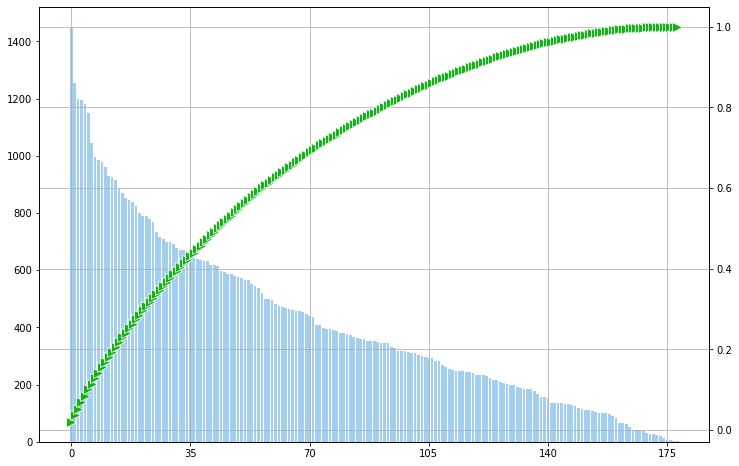

In [7]:
'''Aprimorar gráfico'''
plt.subplots(figsize=(12, 8))

# Gráfico de barras
sns.barplot(x=list(x for x in range(0, 179)), y=vendas['Ship-to nu'].value_counts().values, color='xkcd:light blue')
plt.xticks([0, 35, 70, 105, 140, 175])
plt.grid(axis='x')

# Gráfico cumulativo
plt.twinx()
sns.lineplot(x=list(x for x in range(0, 179)), y=cumulativoclientes, lw=3, color='xkcd:green', marker='>', markersize=10)

# Aprimoração da visualização
plt.grid()

plt.show()

### Marcas comercializadas

In [70]:
vendas.index  # 73.670
vendas.Brand.isna().sum()  # 45.354
vendas.Brand.value_counts().sum()  # 28.316
vendas.Brand.value_counts()  # As dez marcas...

LEFFE               12253
HOEGAARDEN           4514
TRIPLE KARMELIET     3383
KWAK                 2808
BUD                  1901
GOOSE                1324
CORONA               1322
GINETTE               434
CAMDEN                315
BIRRA DEL BORGO        62
Name: Brand, dtype: int64

In [71]:
vendas.Brand.value_counts() / 28316  # ... em porcentagem

LEFFE               0.432724
HOEGAARDEN          0.159415
TRIPLE KARMELIET    0.119473
KWAK                0.099167
BUD                 0.067135
GOOSE               0.046758
CORONA              0.046687
GINETTE             0.015327
CAMDEN              0.011124
BIRRA DEL BORGO     0.002190
Name: Brand, dtype: float64

In [9]:
cumulativo = []

for i in range(len(vendas.Brand.value_counts().index)):
    cumulativo.append(vendas.Brand.value_counts()[i] / 28316)
    
for i in range(1, len(vendas.Brand.value_counts().index)):
    cumulativo[i] += cumulativo[i - 1]
    
cumulativo

[0.4327235485238028,
 0.5921387201582144,
 0.7116118095776239,
 0.8107783585252154,
 0.8779135471111739,
 0.9246715637801949,
 0.9713589490040966,
 0.9866859725949992,
 0.9978104252012996,
 1.0]

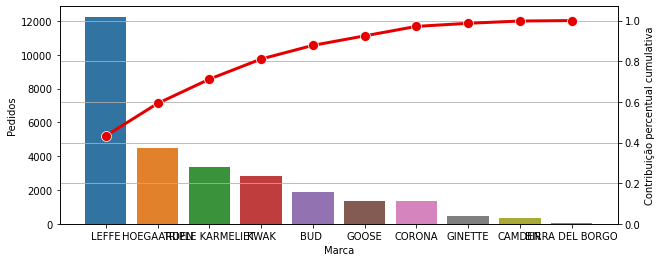

In [11]:
'''Aprimorar gráfico'''
plt.subplots(figsize=(10, 4))

# Gráfico de barras
sns.barplot(x=vendas.Brand.value_counts().index, y=vendas.Brand.value_counts())
plt.xlabel("Marca")
plt.ylabel("Pedidos")

# Gráfico de linha cumulativa de vendas
plt.twinx()
sns.lineplot(x=vendas.Brand.value_counts().index, y=cumulativo, lw=3, color='xkcd:red', marker='o', markersize=10)
plt.ylim(0, 1.07)
plt.ylabel("Contribuição percentual cumulativa")

# Aprimoração da visualização
plt.grid()

plt.show()

## Volume por pedido

In [111]:
vendas['Order qty'].sort_values(axis=0).value_counts(sort=False)  # 256 quantidades diferentes não-inteiras

# Agrupamento
## Índice
list(vendas['Order qty'].sort_values(axis=0).value_counts(sort=False).index)  # [0-14] < 2 e 2 <= [15-16] < 3

volumeindex = list(vendas['Order qty'].sort_values(axis=0).value_counts(sort=False).index)[17:]
volumeindex.insert(0, 2.0)
volumeindex.insert(0, 1.0)
volumeindex

## Conteúdo
list(vendas['Order qty'].sort_values(axis=0).value_counts(sort=False).values)[17:]

volumevalores = list(vendas['Order qty'].sort_values(axis=0).value_counts(sort=False).values)[17:]
volumevalores.insert(0, 3693)  # [15:17] = [3691, 2]
volumevalores.insert(0, 8468)  # [:15] = [8457, 2, 4, 1, 3, 7, 3, 2, 1, 2, 1, 1, 1, 42, 1]
volumevalores

## Volume absoluto
volumeabsoluto = list(np.array(volumeindex) * np.array(volumevalores))
volumeabsoluto

## Total para calcular porcentagem
total = 0

for valor in volumeabsoluto:
    total += valor

total  # 4.220.713


## Cumulação do volume absoluto dos pedidos
cumulativopedidos = []

for i in range(len(volumeabsoluto)):
    cumulativopedidos.append(volumeabsoluto[i] / total)
    
for i in range(1, len(volumeabsoluto)):
    cumulativopedidos[i] += cumulativopedidos[i - 1]
    
cumulativopedidos

[0.002006296092627004,
 0.00375623739401376,
 0.005669658183344852,
 0.007119650163372871,
 0.007799630062503658,
 0.010752211770854829,
 0.011082250795067089,
 0.014077005472772016,
 0.01582339287224694,
 0.03264756452286616,
 0.0327909052333101,
 0.03737686026033989,
 0.03772490572090544,
 0.03795709397914522,
 0.04083930842964209,
 0.044330661667827204,
 0.04443941106632931,
 0.049220119918127574,
 0.049319155318070663,
 0.08065509310867619,
 0.08182432683766937,
 0.08228822950056068,
 0.08373774762700045,
 0.09688434157925449,
 0.09717457690205422,
 0.0984065962314898,
 0.0990462985756198,
 0.09918561153056367,
 0.09921309503868185,
 0.11546153457958407,
 0.11547622404081964,
 0.12079854754398131,
 0.12120511392269505,
 0.12125344698869599,
 0.12144417305796437,
 0.12611826485240762,
 0.12617086260070276,
 0.12626989800064586,
 0.1267041848142719,
 0.14831190843821884,
 0.14834105043389587,
 0.14904756613396833,
 0.14908831754255736,
 0.14931766267926766,
 0.15033052472414019,
 0.1

In [106]:
## Total de pedidos
volumetotal = 0

for valor in volumevalores:
    volumetotal += valor

volumetotal  # 73.610 (conferir número abaixo do número de linhas 73.670, apesar de não haver NA)

## Cumulação da quantidade de pedidos
cumulativolume = []

for i in range(len(volumevalores)):
    cumulativolume.append(volumevalores[i] / volumetotal)
    
for i in range(1, len(volumevalores)):
    cumulativolume[i] += cumulativolume[i - 1]
    
cumulativolume

[0.11503871756554816,
 0.16520853144953132,
 0.20177964950414345,
 0.22256486890368155,
 0.230362722456188,
 0.25857899741882895,
 0.2612824344518408,
 0.2827469093873115,
 0.2938731150658878,
 0.3903409862790382,
 0.39108816736856405,
 0.4130009509577503,
 0.414536068468958,
 0.4154870262192637,
 0.4265045510120908,
 0.4390164379839696,
 0.4393832359733732,
 0.4546121450889825,
 0.45491101752479285,
 0.5447493547072408,
 0.5479418557261242,
 0.5491509305800842,
 0.5527645700312458,
 0.58417334601277,
 0.584839016437984,
 0.5875560385817145,
 0.5889145496535797,
 0.5891998369786714,
 0.589254177421546,
 0.6203097405243853,
 0.6203369107458225,
 0.6298736584703165,
 0.6305800842276864,
 0.6306615948919984,
 0.6309740524385273,
 0.6384186931123488,
 0.6385002037766607,
 0.6386496399945659,
 0.6392881401983426,
 0.6702621926368699,
 0.6703029479690259,
 0.6712674908300502,
 0.6713218312729248,
 0.6716207037087352,
 0.6729112892270072,
 0.6731286509985056,
 0.6891047412036407,
 0.689131911

### Gráfico de volume de pedidos

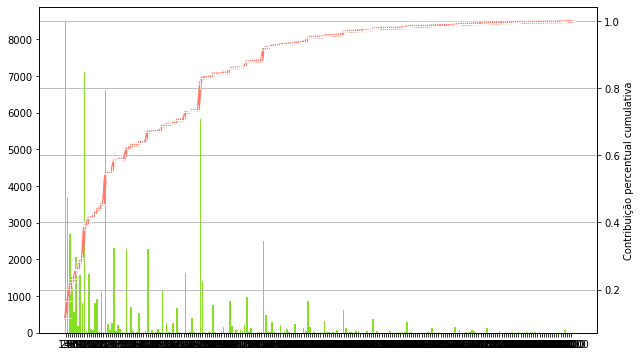

In [109]:
'''Aprimorar gráfico'''
plt.subplots(figsize=(10, 6))

# Gráfico de barras
sns.barplot(x=volumeindex, y=volumevalores, color='xkcd:lime green')

# Gráfico de linha
plt.twinx()
sns.lineplot(x=list(x for x in range(len(volumeindex))), y=cumulativolume, lw=3, color='xkcd:salmon', marker='+', markersize=10)
plt.ylabel("Contribuição percentual cumulativa")

# Aprimoração da visualização
plt.grid()

plt.show()

### Gráfico de volume absoluto

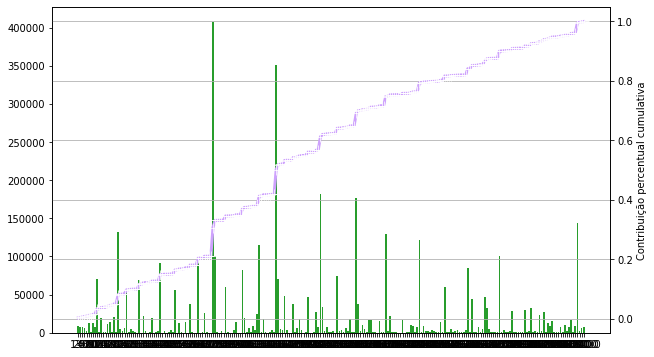

In [110]:
'''Aprimorar gráfico'''
plt.subplots(figsize=(10, 6))

# Gráfico de barras
sns.barplot(x=volumeindex, y=volumeabsoluto, color='xkcd:green')

# Gráfico de linha
plt.twinx()
sns.lineplot(x=list(x for x in range(len(volumeindex))), y=cumulativopedidos, lw=3, color='xkcd:lilac', marker='+', markersize=10)
plt.ylabel("Contribuição percentual cumulativa")

# Aprimoração da visualização
plt.grid()

plt.show()